In [1]:
import pandas as pd
# 그래프 저장시 해상도 높게
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import seaborn as sns
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안 보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

In [2]:
filepath='D:/ai/Downloads/Data/apt/'

In [3]:
df = pd.read_csv(filepath+'실거래가_정리.csv')
df_only = pd.read_csv(filepath+'1인가구.csv')
df_all = pd.read_csv(filepath+'주민등록.csv')

In [4]:
df_merge=pd.merge(df_only,df,on=['시도명','시군구명','읍면동명'],how='outer')
df_merge=pd.merge(df_merge,df_all,on=['시도명','시군구명','읍면동명'],how='outer')

In [5]:
df_merge=df_merge.drop(list(df_merge[df_merge['면적당금액(만원)'].isna()].index),axis=0)
df_merge=df_merge.drop(list(df_merge[df_merge['18세미만 1인가구수'].isna()].index),axis=0)

In [6]:
df_merge['인구비율']=df_merge['18세미만 1인가구수']/df_merge['18세미만 주민등록 인구수']
df_merge

,시도명,시군구명,읍면동명,18세미만 1인가구수,면적당금액(만원),18세미만 주민등록 인구수,인구비율
0,서울특별시,종로구,사직동,2.0,1254.0,928.0,0.002155
2,서울특별시,종로구,부암동,2.0,631.0,982.0,0.002037
3,서울특별시,종로구,평창동,12.0,756.0,2170.0,0.005530
6,서울특별시,종로구,혜화동,5.0,830.0,1302.0,0.003840
16,서울특별시,중구,신당동,3.0,1335.0,404.0,0.007426
...,...,...,...,...,...,...,...
2400,전북특별자치도,고창군,고창읍,1.0,215.0,3299.0,0.000303
2403,전북특별자치도,부안군,부안읍,11.0,182.0,3039.0,0.003620
2406,전북특별자치도,부안군,변산면,1.0,132.0,271.0,0.003690
2407,전북특별자치도,부안군,진서면,2.0,102.0,117.0,0.017094


In [7]:
idx=list(df_merge[df_merge['시도명'].str.contains('특별시|광역시|자치시')]['시도명'].unique())
idx

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시']

서울특별시


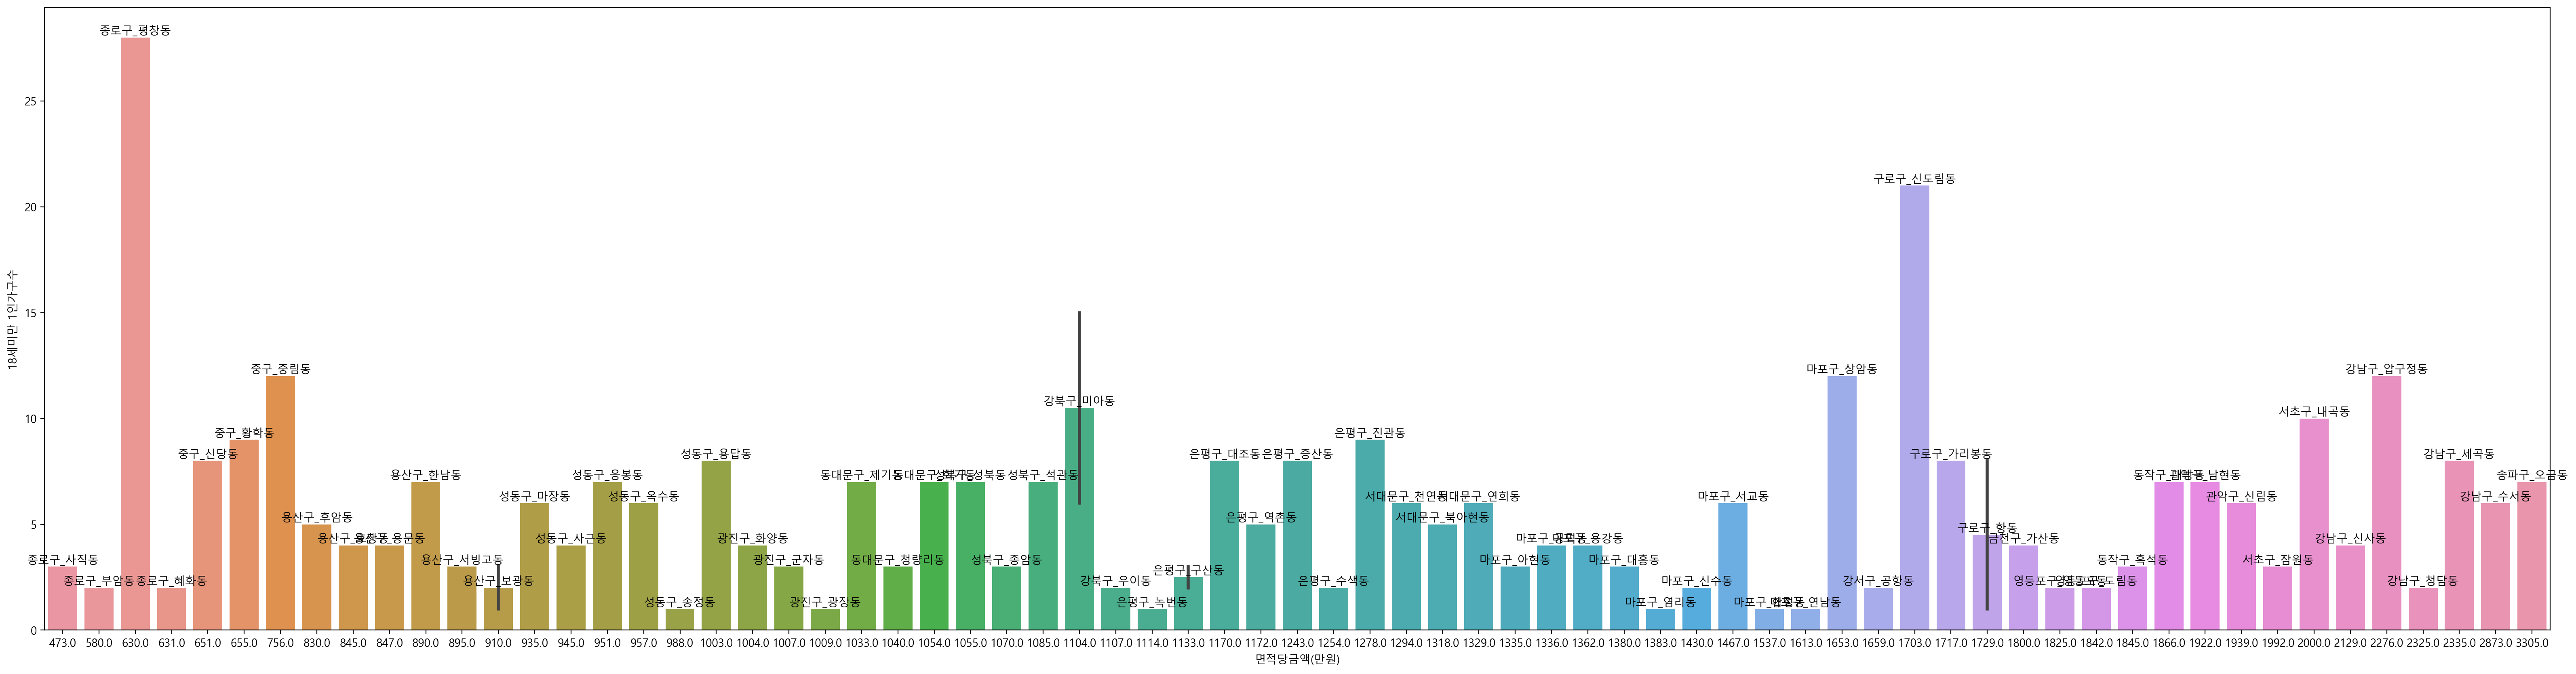

부산광역시


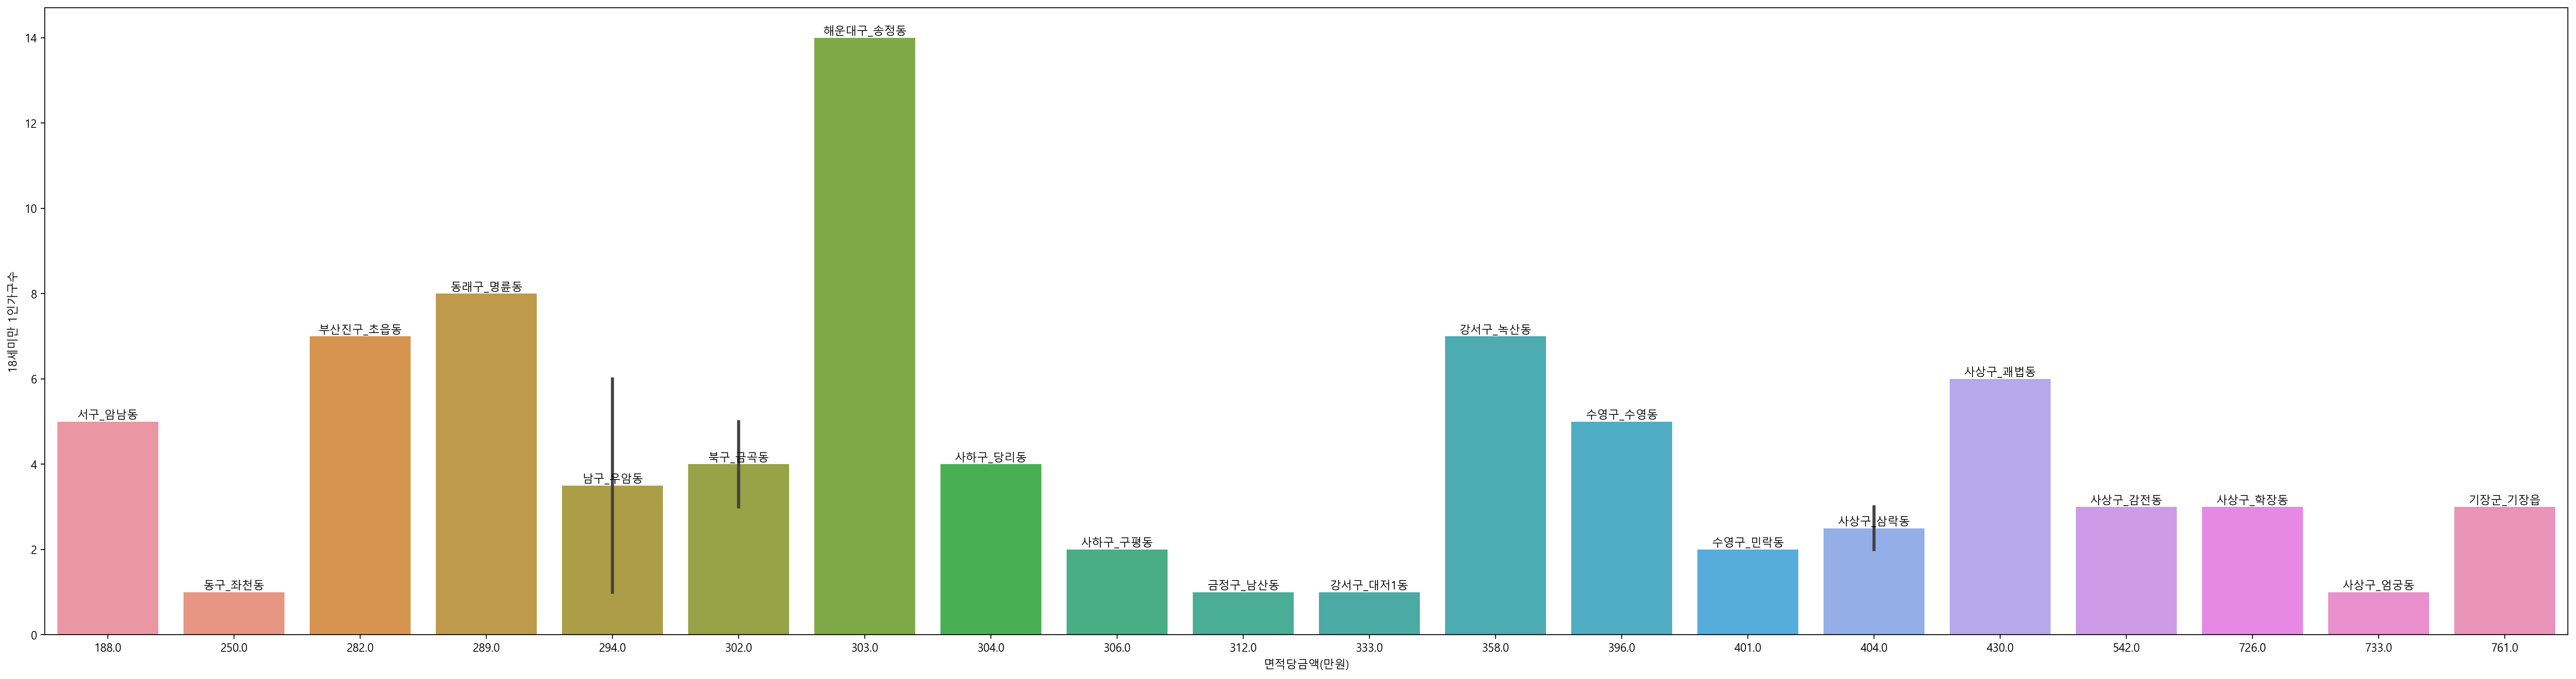

대구광역시


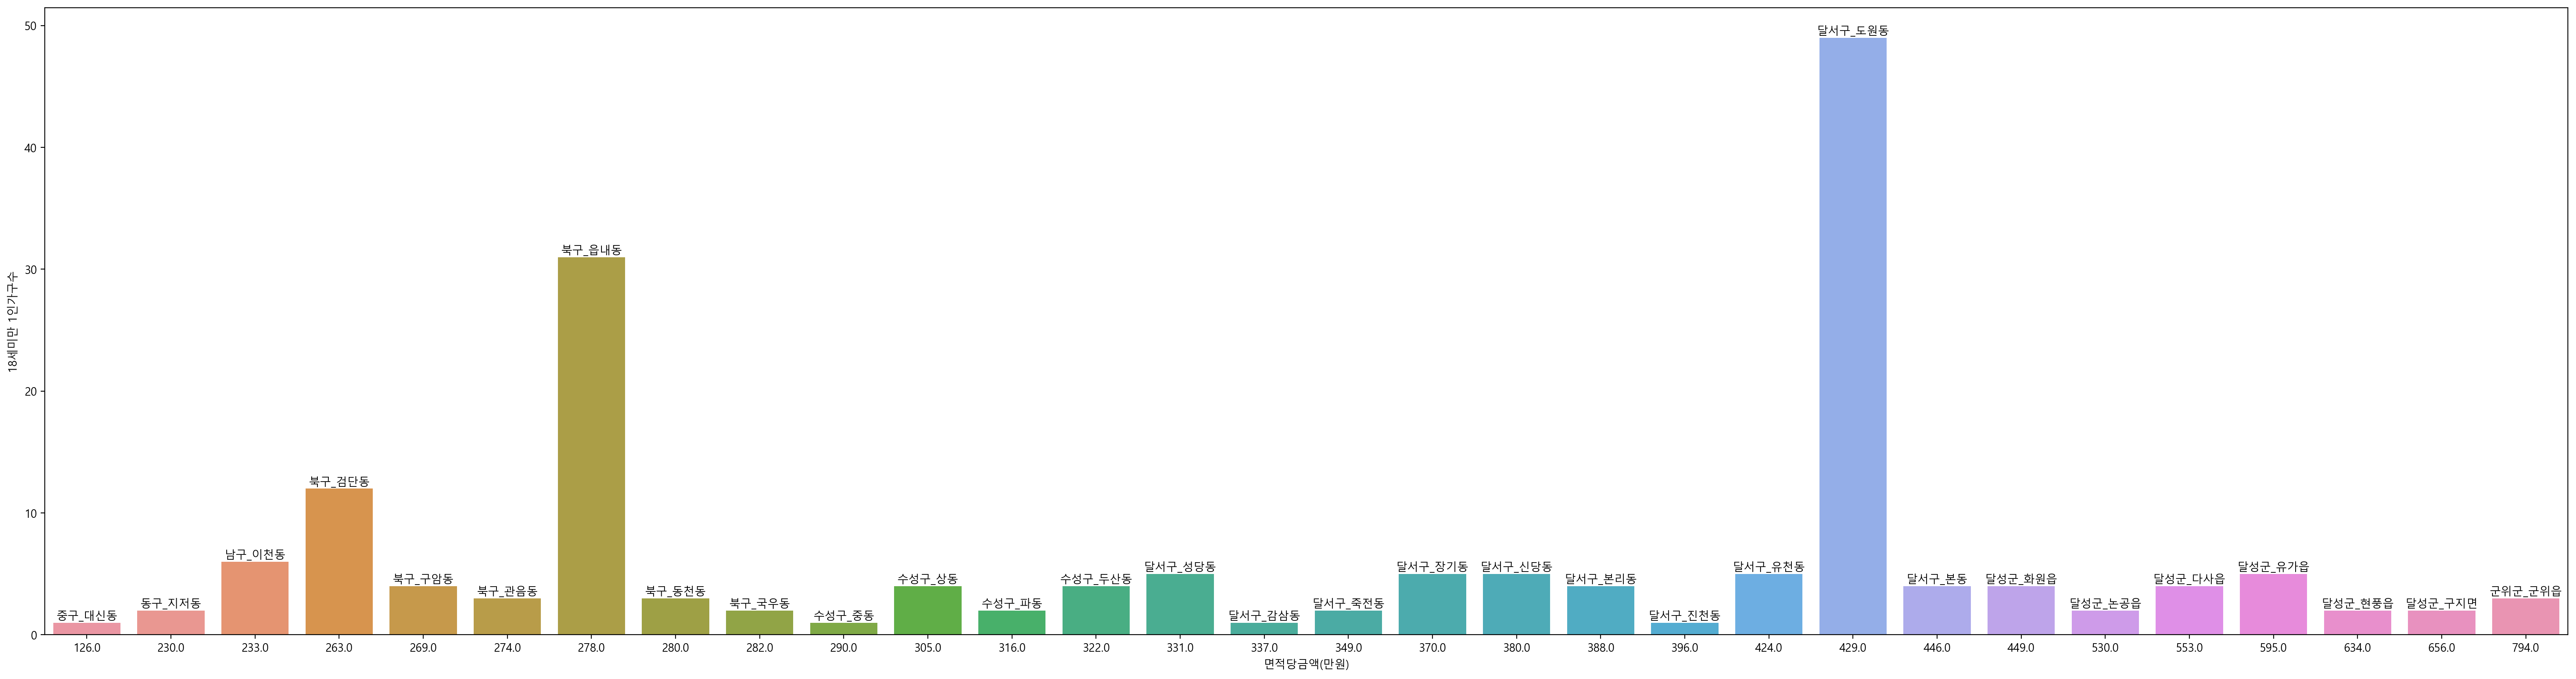

인천광역시


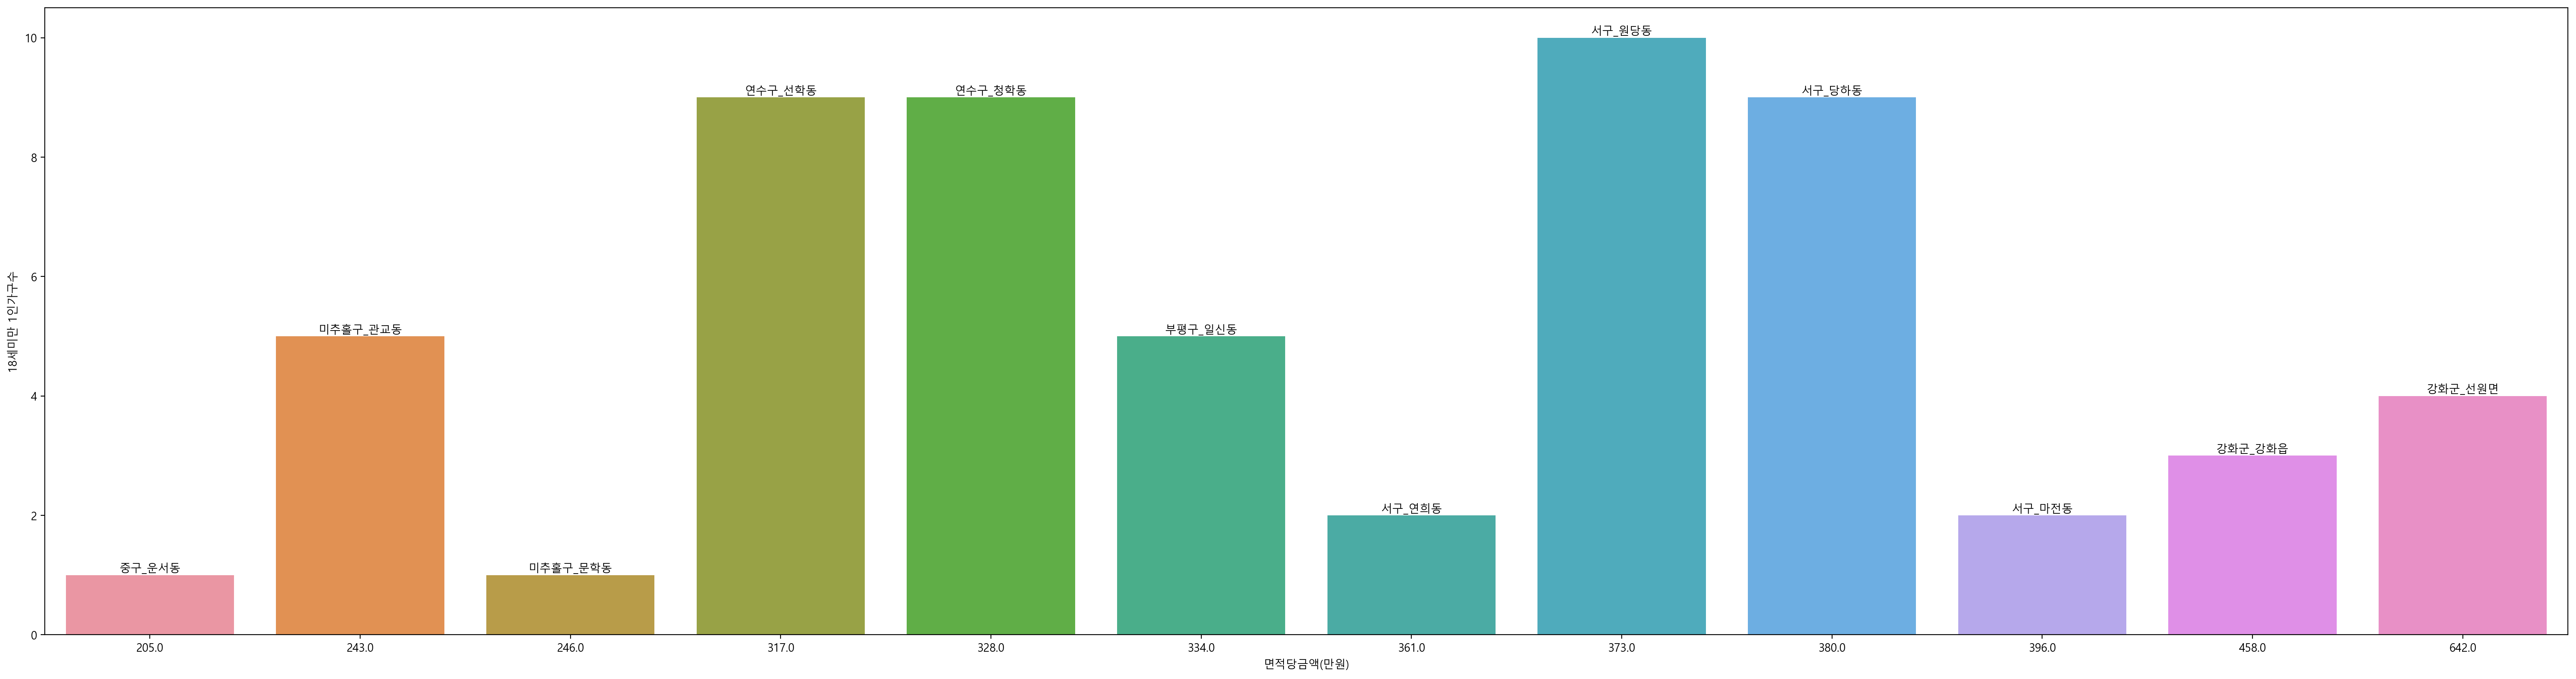

광주광역시


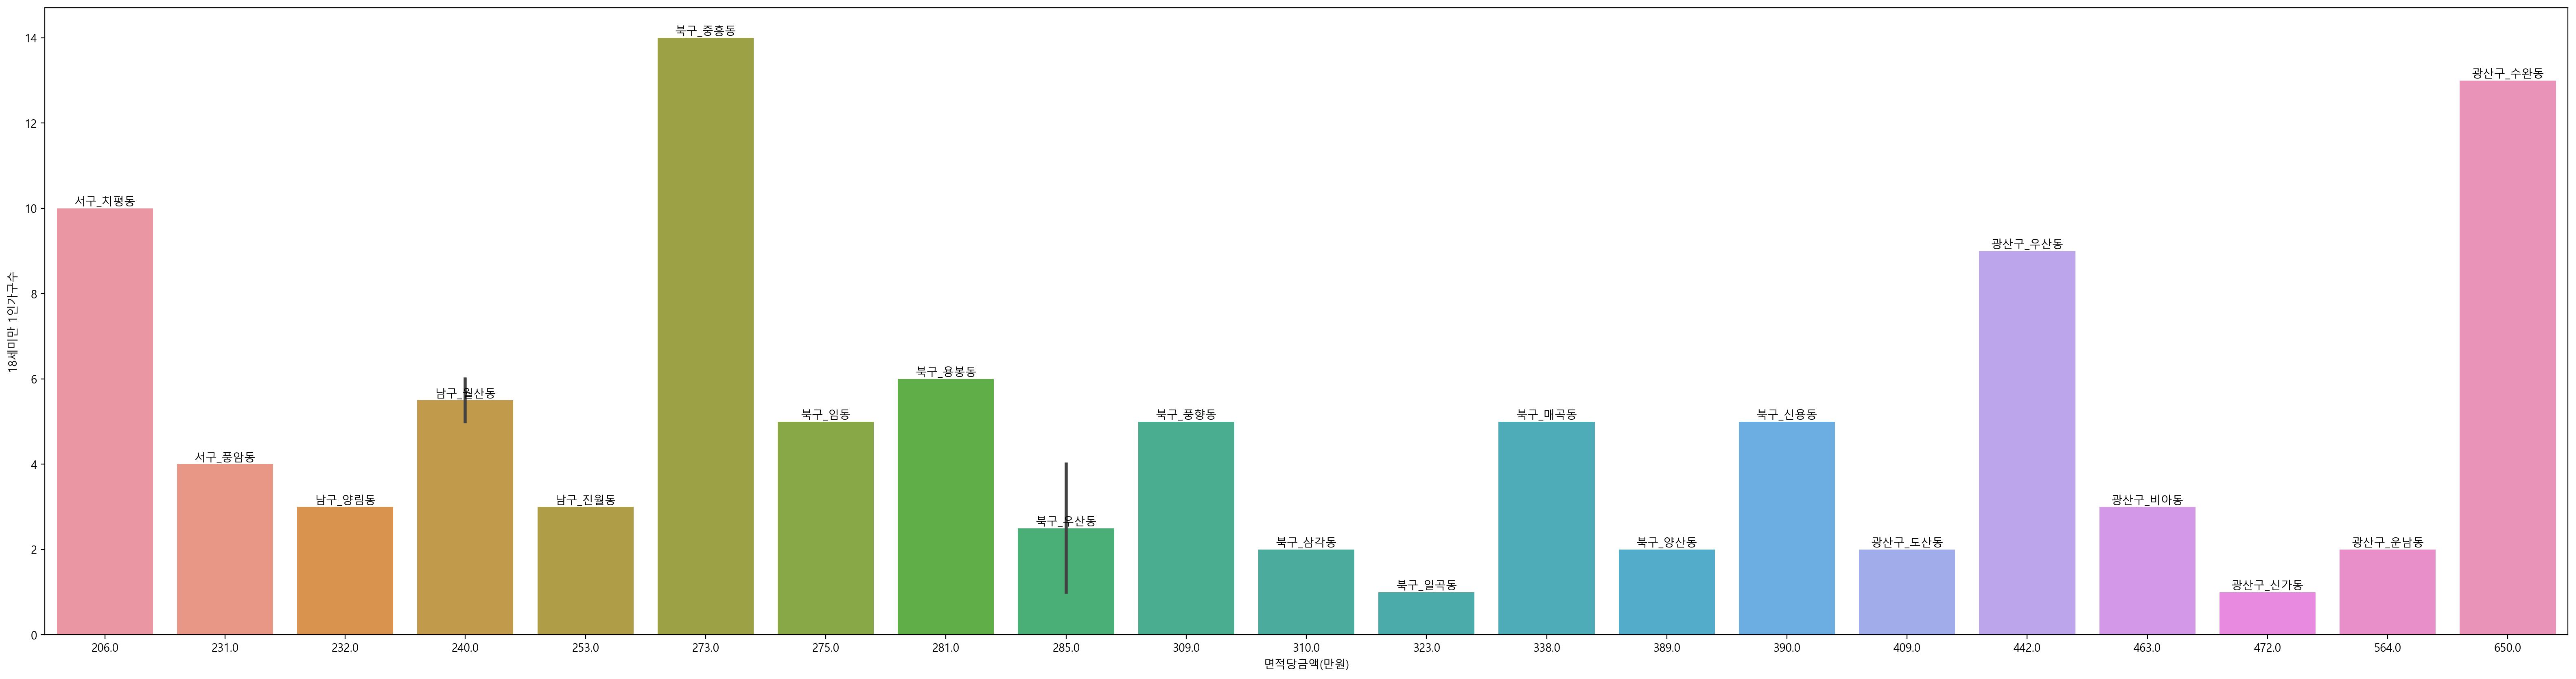

대전광역시


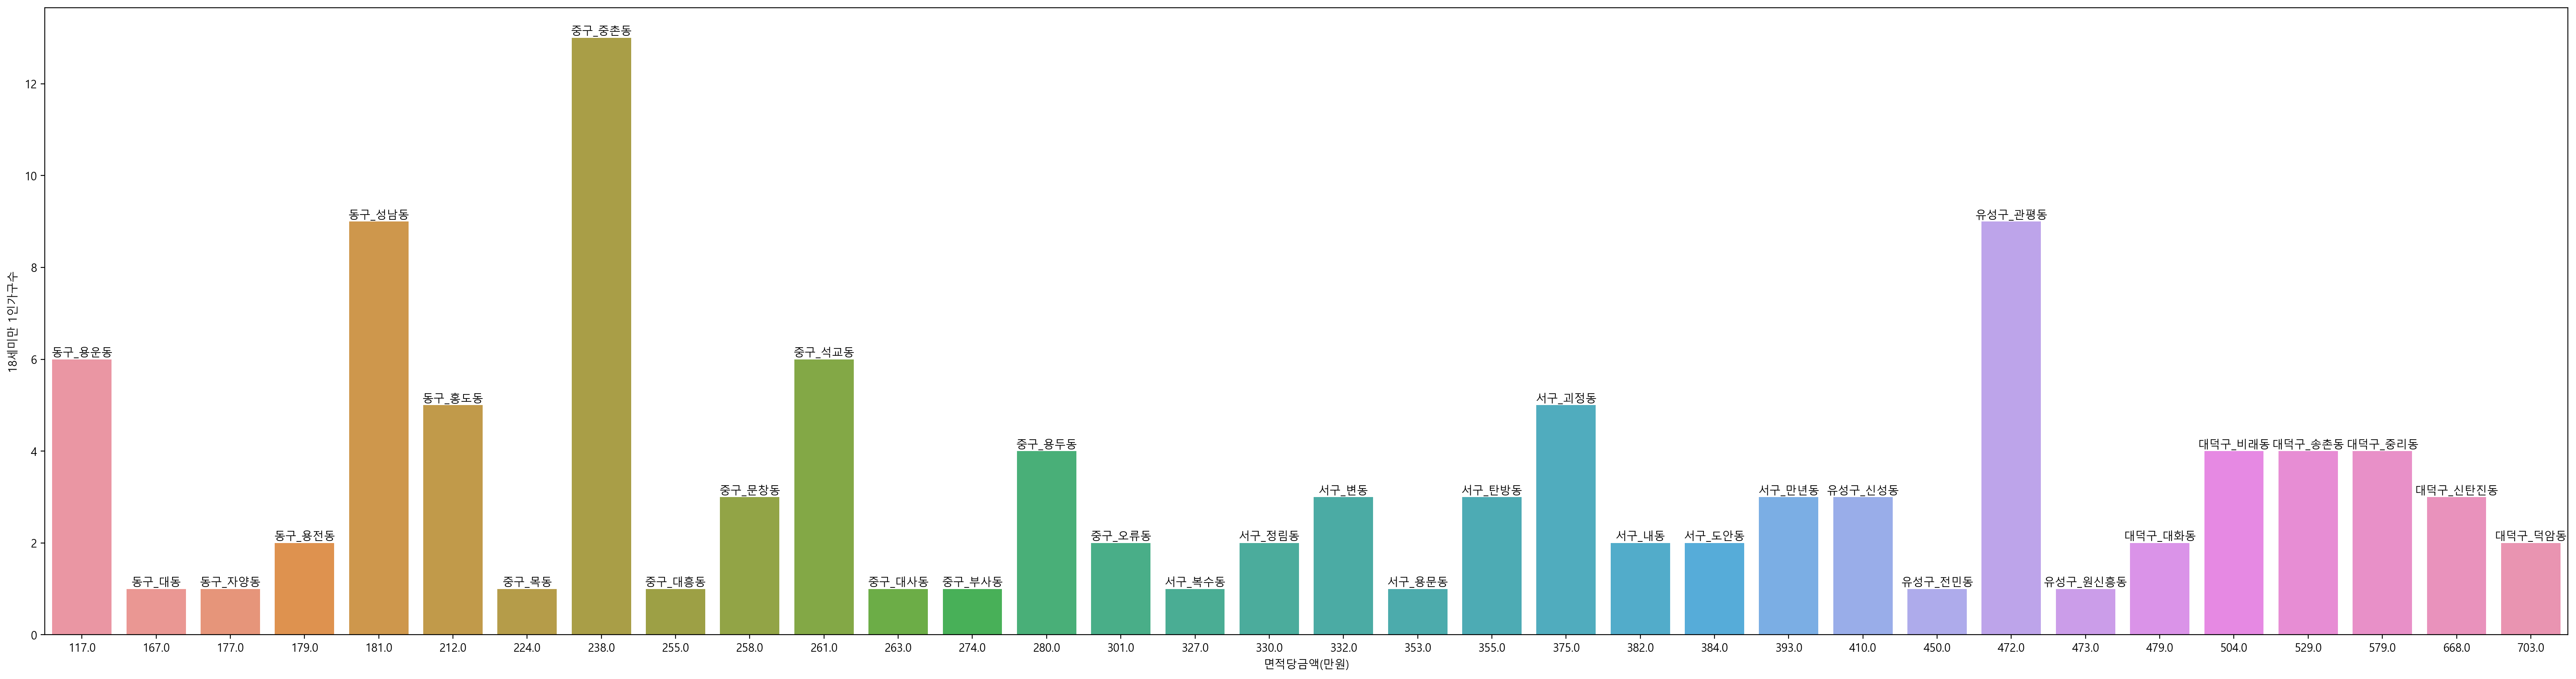

울산광역시


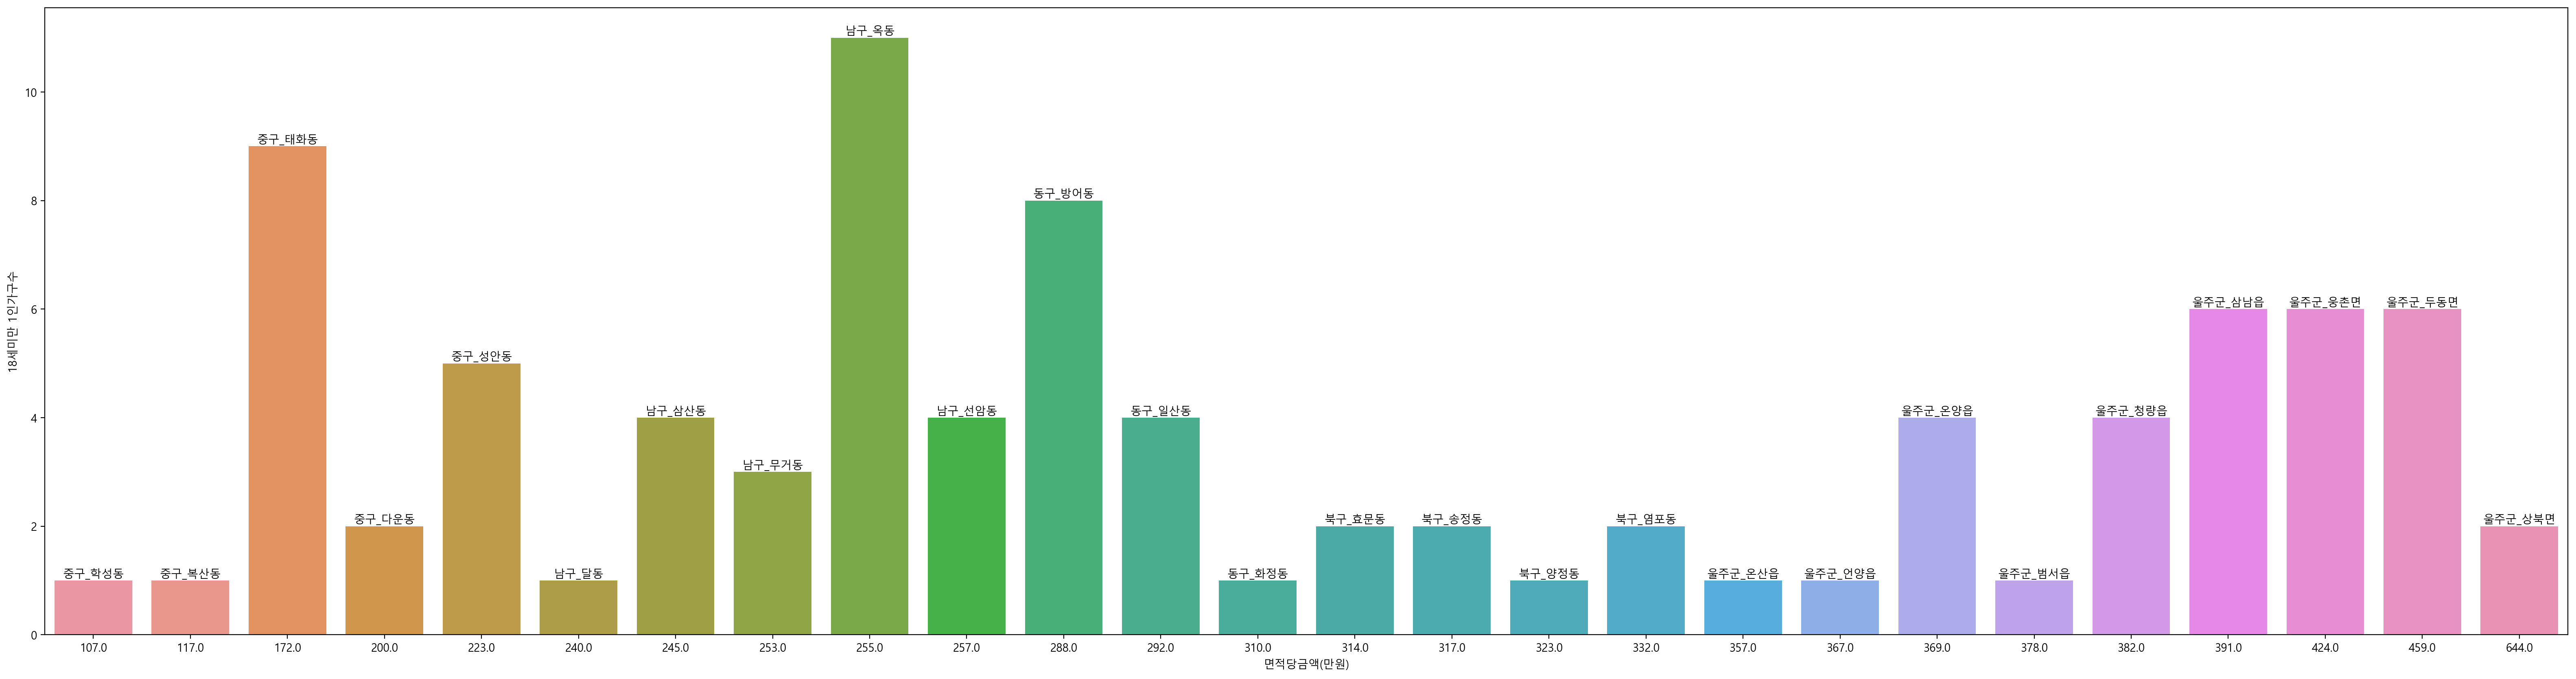

세종특별자치시


TypeError: unsupported operand type(s) for +: 'float' and 'str'

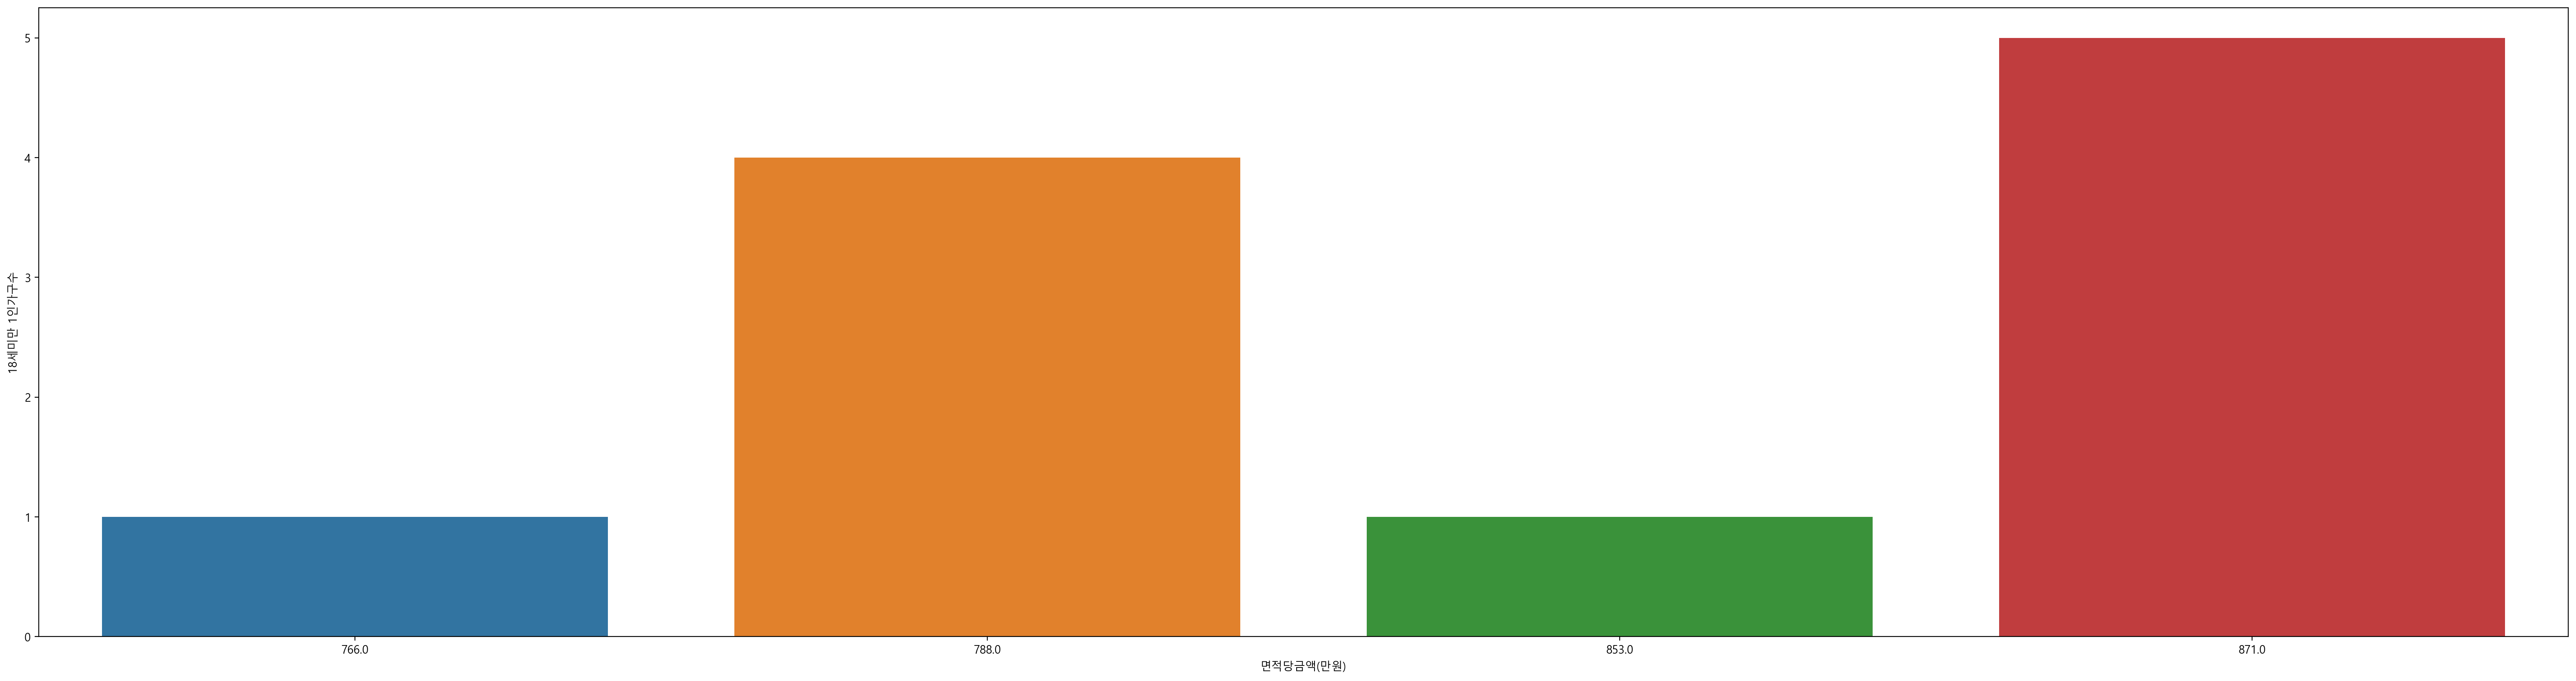

In [10]:
for i in idx:
    print(i)
    plt.figure(figsize=(40,10))
    temp=df_merge[df_merge['시도명']==i]
    ax = sns.barplot(data=temp, x='면적당금액(만원)', y='18세미만 1인가구수',)
    x=0
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # 막대의 중앙
            p.get_height(),          # 막대 높이 위에 약간 띄운 위치
            temp['시군구명'].iloc[x]+'_'+temp['읍면동명'].iloc[x],      # 표시할 값 (정수로 변환)
            ha='center',                   # 수평 정렬
            va='bottom',                   # 수직 정렬
            fontsize=10                    # 글꼴 크기
        )
        x+=1
    plt.savefig(f'{filepath}png/{i}금액_1인가구수.png',dpi=300,bbox_inches='tight')
    plt.show()

In [ ]:
idx=list(df_merge[~df_merge['시도명'].str.contains('특별시|광역시|자치시')]['시도명'].unique())
idx

In [ ]:
for i in idx:
    print(i)
    idx_j=list(df_merge[df_merge['시도명']==i]['시군구명'].unique())
    for j in idx_j:
        plt.figure(figsize=(40,10))
        temp=df_merge[(df_merge['시도명']==i)&(df_merge['시군구명']==j)]
        if(len(temp)<=4):
            continue
        ax = sns.barplot(data=temp, x='면적당금액(만원)', y='18세미만 1인가구수',)
        x=0
        for p in ax.patches:
            ax.text(
                p.get_x() + p.get_width() / 2,  # 막대의 중앙
                p.get_height(),          # 막대 높이 위에 약간 띄운 위치
                temp['읍면동명'].iloc[x],      # 표시할 값 (정수로 변환)
                ha='center',                   # 수평 정렬
                va='bottom',                   # 수직 정렬
                fontsize=10                    # 글꼴 크기
            )
            x+=1
        plt.title(f'{i}_{j}', fontsize=16)
        plt.savefig(f'{filepath}png/{i}_{j}_금액_1인가구수.png',dpi=300,bbox_inches='tight')
        plt.show()